
# chapitre 2 Deep Learning IAS
### Auteur: Papa Séga WADE

# Step 1 - Importation et initialisation 

In [ ]:
import numpy as np
from sklearn.datasets     import load_iris
from sklearn.linear_model import Perceptron 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


## Step 2 - Preparation du jeu de données IRIS 

Retrieve a dataset : http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets  
About the datesets : http://scikit-learn.org/stable/datasets/index.html  

Data fields (X) :  https://fr.wikipedia.org/wiki/Iris_de_Fisher#Le_jeu_de_donn%C3%A9es
- 0 : sepal length in cm
- 1 : sepal width in cm
- 2 : petal length in cm
- 3 : petal width in cm  

Class (y) :
- 0 : class 0=Iris-Setosa, 1=Iris-Versicolour, 2=Iris-Virginica

### 2.1 - Get dataset

In [ ]:
from sklearn import datasets
irisData = datasets.load_iris() 
print(irisData.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
x0,y0 = load_iris(return_X_y=True)

x = x0[:, (2,3)]  
y = y0.copy()

y[ y0==0 ] = 1       # 1 = Iris setosa
y[ y0>=1 ] = 0       # 0 = non un iris setosa

df=pd.DataFrame.from_dict({'Length (x1)':x[:,0], 'Width (x2)':x[:,1], 'Setosa {0,1} (y)':y})
display(df)

print(f'x shape : {x.shape}')
print(f'y shape : {y.shape}')

,Length (x1),Width (x2),"Setosa {0,1} (y)"
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


x shape : (150, 2)
y shape : (150,)


### 2.2 - Train and test sets

In [ ]:
### split de notre jeu données en données d'apprentissage (80% ) et de test (20%)
n=int(len(x)*0.8)  # 80% apprentissage
x_train = x[:n] # %80 dataset 
y_train = y[:n]
x_test  = x[n:]   # 20% du dataset 
y_test  = y[n:]

print(f'x_train shape : {x_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'x_test shape  : {x_test.shape}')
print(f'y_test shape  : {y_test.shape}')

x_train shape : (120, 2)
y_train shape : (120,)
x_test shape  : (30, 2)
y_test shape  : (30,)


## Step 3 - Un perceptron et entraienement du modele 

In [ ]:
 ## Entraînement de notre modèle sur 7 epochs 
pct = Perceptron(max_iter=100, random_state=82, tol=0.01, verbose=1)
pct.fit(x_train, y_train)

-- Epoch 1
Norm: 1.30, NNZs: 2, Bias: 2.000000, T: 120, Avg. loss: 0.135417
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.30, NNZs: 2, Bias: 2.000000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.30, NNZs: 2, Bias: 2.000000, T: 360, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.30, NNZs: 2, Bias: 2.000000, T: 480, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 1.30, NNZs: 2, Bias: 2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 1.30, NNZs: 2, Bias: 2.000000, T: 720, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1.30, NNZs: 2, Bias: 2.000000, T: 840, Avg. loss: 0.000000
Total training time: 0.01 seconds.
Convergence after 7 epochs took 0.01 seconds


Perceptron(max_iter=100, random_state=82, tol=0.01, verbose=1)

## Step 4 - Prédictions

In [ ]:
## Cette partie concerne la prédiction sur les données de test qu'on avait pas utilisé lors de l'apprentissage. 
y_pred = pct.predict(x_test)  ## ici avec la focntion predict

## ici on transforme notre prédiction en dataframe utilisant la librairie pandas afin de pouvoir faire la visualisation. 
df=pd.DataFrame.from_dict({'Length (x1)':x_test[:,0], 'Width (x2)':x_test[:,1], 'y_test':y_test, 'y_pred':y_pred})
display(df[:15])

,Length (x1),Width (x2),y_test,y_pred
0,5.7,2.3,0,0
1,4.9,2.0,0,0
2,6.7,2.0,0,0
3,4.9,1.8,0,0
4,5.7,2.1,0,0
5,6.0,1.8,0,0
6,4.8,1.8,0,0
7,4.9,1.8,0,0
8,5.6,2.1,0,0
9,5.8,1.6,0,0


## Step 5 - Visualisation

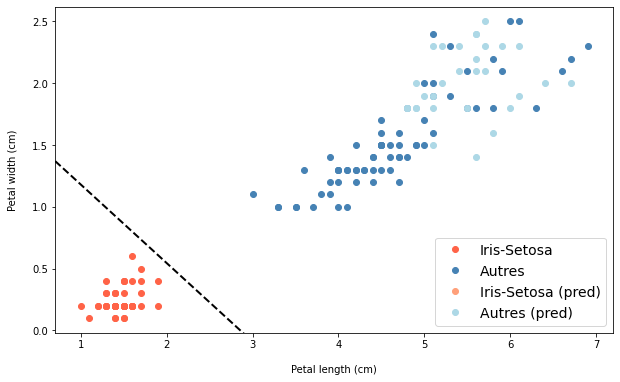

In [ ]:
### C'est fonction qui nous permet de faire l'affichage de notre classification 
## qui prend en entré les doonées d'apprentissage et test 
## l'idée est surtout de determiner la frontière de décision séparant nos deux classes. 

def plot_perceptron(x_train,y_train,x_test,y_test):
    a = -pct.coef_[0][0] / pct.coef_[0][1]
    b = -pct.intercept_ / pct.coef_[0][1]
    box=[x.min(axis=0)[0],x.max(axis=0)[0],x.min(axis=0)[1],x.max(axis=0)[1]]
    mx=(box[1]-box[0])/20
    my=(box[3]-box[2])/20
    box=[box[0]-mx,box[1]+mx,box[2]-my,box[3]+my]

    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(10,6)
 
    axs.plot(x_train[y_train==1, 0], x_train[y_train==1, 1], "o", color='tomato', label="Iris-Setosa")
    axs.plot(x_train[y_train==0, 0], x_train[y_train==0, 1], "o", color='steelblue',label="Autres")
    
    axs.plot(x_test[y_pred==1, 0],   x_test[y_pred==1, 1],   "o", color='lightsalmon', label="Iris-Setosa (pred)")
    axs.plot(x_test[y_pred==0, 0],   x_test[y_pred==0, 1],   "o", color='lightblue',   label="Autres (pred)")
    
    axs.plot([box[0], box[1]], [a*box[0]+b, a*box[1]+b], "k--", linewidth=2)
    axs.set_xlabel("Petal length (cm)", labelpad=15) #, fontsize=14)
    axs.set_ylabel("Petal width (cm)",  labelpad=15) #, fontsize=14)
    axs.legend(loc="lower right", fontsize=14)
    axs.set_xlim(box[0],box[1])
    axs.set_ylim(box[2],box[3])
    plt.show()
    
plot_perceptron(x_train,y_train, x_test,y_test)